In [2]:
#load the dataset

import pandas as pd

df = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/data/raw/loan_credit_approval_raw.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [5]:
df.info

<bound method DataFrame.info of                                                        id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600

In [6]:
#deal with missing value
missing = df.isnull().sum()
missing_percentage = (missing / len(df))*100
missing_df = pd.DataFrame({'Missing_values': missing,
                           'Missing percentage': missing_percentage}).sort_values('Missing percentage', ascending=False)
missing_df


,Missing_values,Missing percentage
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
...,...,...
policy_code,33,0.001460
revol_bal,33,0.001460
fico_range_high,33,0.001460
fico_range_low,33,0.001460


In [7]:
missing_df[(missing_df['Missing percentage'])<0.01].value_counts

<bound method DataFrame.value_counts of                             Missing_values  Missing percentage
chargeoff_within_12_mths               178            0.007874
collections_12_mths_ex_med             178            0.007874
tax_liens                              138            0.006104
last_credit_pull_d                     105            0.004645
inq_last_6mths                          63            0.002787
total_acc                               62            0.002743
delinq_2yrs                             62            0.002743
earliest_cr_line                        62            0.002743
open_acc                                62            0.002743
pub_rec                                 62            0.002743
acc_now_delinq                          62            0.002743
delinq_amnt                             62            0.002743
annual_inc                              37            0.001637
zip_code                                34            0.001504
purpose        

In [8]:
#figure out the target imbalance
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

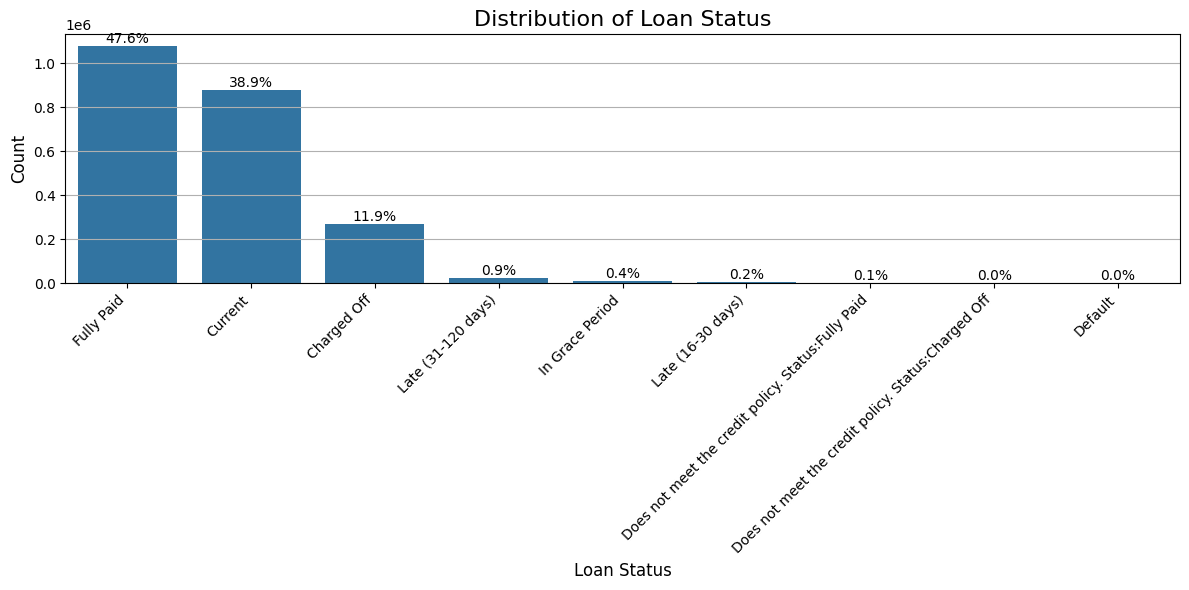

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# using count plot to graph
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)

plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add gridlines
ax.yaxis.grid(True)

plt.savefig('/Users/anhnguyendo/Documents/Python machine learning/Credit risk and loan default prediction/credit-risk-analysis-and-loan-default-prediction/figures/Distribution_of_loan_status.png')
plt.tight_layout()
plt.show()


From the chart, we can see that half of the loan are fully paid. This is also the largest group, indicating a strong borrower payment. On the other hand, almost 40% of the loan are still active and not yet due. There are about 11.9% of the dataset called Charged off, the loan that couldn't be collect. This is our target value in this project.

In [16]:
#keep only useful columns 
useful_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'issue_d', 'loan_status', 'application_type'
]
df = df[useful_cols]

In [ ]:
#keep default status with relevant status(fully paid and charged off)
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


In [22]:
#clean individual column 

#clean percentage column 
for per_col in ['int_rate', 'revol_util']:
    df[per_col] = df[per_col].astype(str).str.rstrip('%').astype(float)

#emp_length
df['emp_length'] = df['emp_length'].astype(str).str.extract('(\d+)').astype(float)

#convert dates
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%Y')

In [23]:
#drop columns with > 50% missing
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() < threshold]

#drop columns with only 1 unique value
df = df.loc[:, df.nunique() > 1]

#drop row with missing value in key features
# Drop rows with missing values in key features
df = df.dropna(subset=['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length'])

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_d,loan_status,application_type,default
0,3600.0,36 months,13.99,123.03,C,C4,10.0,MORTGAGE,55000.0,Not Verified,...,679.0,7.0,0.0,2765.0,29.7,13.0,2015-12-01,Fully Paid,Individual,0
1,24700.0,36 months,11.99,820.28,C,C1,10.0,MORTGAGE,65000.0,Not Verified,...,719.0,22.0,0.0,21470.0,19.2,38.0,2015-12-01,Fully Paid,Individual,0
2,20000.0,60 months,10.78,432.66,B,B4,10.0,MORTGAGE,63000.0,Not Verified,...,699.0,6.0,0.0,7869.0,56.2,18.0,2015-12-01,Fully Paid,Joint App,0
4,10400.0,60 months,22.45,289.91,F,F1,3.0,MORTGAGE,104433.0,Source Verified,...,699.0,12.0,0.0,21929.0,64.5,35.0,2015-12-01,Fully Paid,Individual,0
5,11950.0,36 months,13.44,405.18,C,C3,4.0,RENT,34000.0,Source Verified,...,694.0,5.0,0.0,8822.0,68.4,6.0,2015-12-01,Fully Paid,Individual,0


In [25]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_d,default
count,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.266782e+06,1.265976e+06,1.266782e+06,1266782,1.266782e+06
mean,1.460112e+04,1.323370e+01,4.429329e+02,6.051227e+00,7.790051e+04,1.812865e+01,3.215163e-01,6.961255e+02,7.001257e+02,1.167218e+01,2.089507e-01,1.643779e+04,5.205292e+01,2.506946e+01,2015-05-30 04:15:15.824822528,1.953185e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,1.000000e+00,3.300000e+01,-1.000000e+00,0.000000e+00,6.250000e+02,6.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2007-06-01 00:00:00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.521400e+02,2.000000e+00,4.800000e+04,1.176000e+01,0.000000e+00,6.700000e+02,6.740000e+02,8.000000e+00,0.000000e+00,6.039000e+03,3.380000e+01,1.600000e+01,2014-07-01 00:00:00,0.000000e+00
50%,1.207500e+04,1.274000e+01,3.794200e+02,6.000000e+00,6.500000e+04,1.752000e+01,0.000000e+00,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,1.128300e+04,5.250000e+01,2.300000e+01,2015-08-01 00:00:00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.873400e+02,1.000000e+01,9.250000e+04,2.391000e+01,0.000000e+00,7.100000e+02,7.140000e+02,1.400000e+01,0.000000e+00,1.997500e+04,7.100000e+01,3.200000e+01,2016-07-01 00:00:00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.000000e+01,1.099920e+07,9.990000e+02,3.900000e+01,8.450000e+02,8.500000e+02,9.000000e+01,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,2018-12-01 00:00:00,1.000000e+00
std,8.746531e+03,4.769519e+00,2.624472e+02,3.561571e+00,7.108291e+04,9.569931e+00,8.837395e-01,3.166259e+01,3.166319e+01,5.490712e+00,5.975357e-01,2.254783e+04,2.448106e+01,1.201060e+01,NaN,3.964459e-01
